# Medición del periodo de un péndulo

## Resumen
 En este experimento determinaremos el periodo de un péndulo a partir de dos series de 100 mediciones y analizando los datos mediante las bibliotecas Numpy, Matplotlib, Pandas y Scipy de Python. Para ello, dispusimos de los elementos necesarios para realizar mediciones directas de la manera mas precisa posible, de forma que no varíe la longitud del péndulo ni el punto de inicio (desde donde se soltaba el péndulo). Comparamos los datos obtenidos realizando histogramas para obtener la moda, calculamos el promedio, la desviación estándar y la distribución normal (de Gauss).
  Finalmente, concluimos que el periodo no es un valor único, sino que se encuentra dentro de los rango $T_{conf.1}= (1.94 \pm 0.17) s$ y $T_{conf.2}=(1.85 \pm 0.13 ) s$, en los cuales hay mas probabilidad de que las futuras mediciones se ubiquen dentro de dichos rangos.

## Introducción

El periodo de un péndulo $(T)$ es el tiempo que éste tarda en hacer una oscilación completa en el plano. Un histograma es un gráfico en forma de barras que permite mostrar la distribución de la frecuencia de los datos respecto de una variable (en este caso, del tiempo). Definimos **moda** o **valor modal** como el punto máximo o pico de la observación en la distribución del gráfico (la cuál, para una distribución simétrica, suele coincidir con el valor del promedio).


Definimos el **promedio (o media)$^{(1)}$** según la ecuación:

$ \bar{X} = \frac{\sum_{i=1}^{N} x_{i}}{N}$ **(1)**

donde $\bar{x}$ es el promedio, *N* es la cantidad de mediciones y $x_{i}$ es la i-ésima medida.

Definimos la **desviación estándar (StDev)$^{(2)}$** de la distribución, la cuál nos indica la dispersión de los datos alrededor del promedio, como:

$\delta = \sqrt{\frac{\sum_{i=1}^{N}(\bar{x}-x_{i})^{2}}{N}} $ **(2)**

donde $\bar{x}$ es el promedio, *N* la cantidad de mediciones y $x_{i}$ es la i-ésima medida.

Definimos el **error porcentual $^{(3)}$** como:

$x_{err} = \frac{\delta * 100}{\bar{x}}$ **(3)**

donde $\bar{x}$ es el promedio y $\delta$ es la desviación estándar.

Dfinimos el **promedio ponderado** como:

$\bar{x}=\frac{w_{1}*\bar{x_{1}}+w_{1}*\bar{x_{1}}}{w_{1}+w_{2}}$ **(4)**

donde $\bar{x}$ es el promedio ponderado, $w_{1}$ y $w_{2}$ son los pesos de los promedios ($w=\frac{1}{\delta}$).

Definimos el **error estándar combinado** como:

$\sigma = \sqrt{\frac{1}{w_{1}+w_{2}} }$ **(5)**

Definimos la **distribución de Gauss $^{(4)}$** como:

$\gamma = A e^{-\frac{(x-\bar{x})^{2}}{2\delta^{2}}}$ **(6)**

donde $\bar{x}$ es el promedio, *N* la cantidad de mediciones y $x_{i}$ es la i-ésima medida, $\delta$ es la desviación estándar y $A=\frac{1}{\delta \sqrt{2 \pi}}$.
   
De la distribución gaussiana podemos establecer las probabilidades de que los valores medidos caigan en el centro de la curva (o fuera de esta), mediante los siguientes cálculos:

- 68% de probabilidad: $\bar{x} \pm \delta$ **(7)**
- 95% de probabilidad: $\bar{x} \pm 2\delta$ **(8)**

donde $\bar{x}$ es el promedio y $\delta$ es la desviación estándar.



Estimaremos entre qué valores se encuentra el periodo de un péndulo de 1 metro de longitud, bajo pequeñas oscilaciones, utilizando estos elementos de estadistica para definir el valor mas probable entre varias series de mediciones. Para ellos nos valdremos a partir de los datos obtenidos, de la realización de histogramas mediante las bibliotecas Matplotlib y Pandas de Python, para la observación de la **moda**, y las ecuaciones anteriores para determinar el valor mas confiable del periodo **(T)**.



## Desarrollo Experimental

Para desarrollar el experimento, contamos con una masa esférica atada a una cuerda inextensible, que actuará como nuestro péndulo. El cronómetro de un smartphone (modelo SM-J701M, sistema operativo Android 9), con una incerteza de 0,010 segundos, una cinta métrica con una incerteza de 0,10 cm, un pie o trípode de apoyo y nos ayudamos de un objeto para marca el límite de la amplitud del movimiento (en nuestro caso, utilizamos una banqueta).

Definimos medir $(100,00 \pm 0,10) cm$ la longitud de la cuerda desde la parte superior del tornillo que posee la masa, hasta el punto donde se encuentra con el pie de apoyo, colocando la banqueta a $(20,00 \pm 0,10) cm$, de manera que el péndulo, desde la posición inicial, oscile con un ángulo de $( 11,0 \pm 1,0 )^{\circ}$, como se muestra en la *Figura 1.*

![Figura 1: Disposición de los elementos](Figura_1.png)
>Figura 1: Disposición de los elementos.

Para tratar de evitar diferencias entre la distancia del péndulo en reposo hacia la banqueta, la persona que soltaba el péndulo se sentaba en la misma, y una vez sentado, se volvía a realizar la medición de la distancia y se corregía la posición en caso de ser necesario.

Realizamos 2 series de 100 mediciones cada una, con 2 configuraciones distintas:


1. La persona A tomó el tiempo y la personal B soltó el péndulo.
2. La persona B tomó el tiempo y la personal A soltó el péndulo.

En ambos casos, quien tomaba el tiempo, contaba hasta 3 para que se suelte esta, y se encontraba atento a ver cuando volvía a la posición de inicio para frenar el cronómetro  y asentar los datos para luego analizarlos.


## Resultados y discusión

Obtenidos los datos, mediante el uso de las bibliotecas *Numpy, Matplotlib, Pandas y Scipy*, realizamos histogramas de las primeras 20 mediciones, luego le sumamos las siguientes 40 (60 mediciones en total), y finalmente, con las 100 mediciones para comparar los datos obtenidos entre las dos series. Nos quedamos con los histogramas de las mediciones totales, ya que observamos en ambas configuraciones que no existe diferencia significativa, entre las primeras 60 mediciones y el total, a su vez, solo tomar las primeras 20 mediciones no son suficientes para determinar el rango buscado *(ver apéndice 1)*.

In [24]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [25]:
#Load data

url_a ="Medidas_A.csv"
url_b ="Medidas_B.csv"

med_a = pd.read_csv(url_a)
med_b = pd.read_csv(url_b)

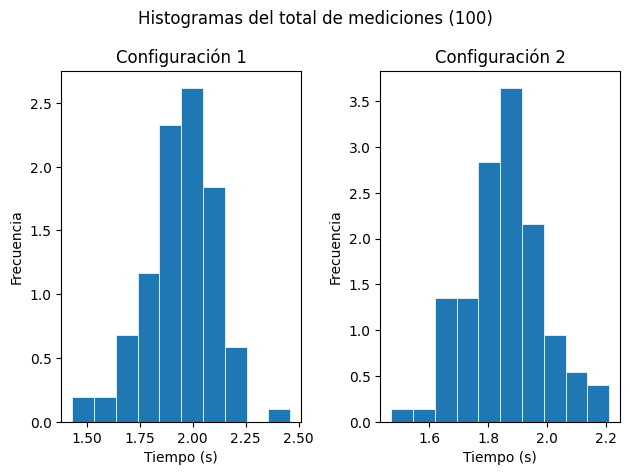

In [26]:
#Ploting histograms

fig1, ax1 = plt.subplots(1,2)

ax1[0].hist(med_a["Tiempo"], density=True, edgecolor="white", linewidth=0.5)
ax1[0].set_xlabel("Tiempo (s)")
ax1[0].set_ylabel("Frecuencia")
ax1[0].set_title("Configuración 1")

ax1[1].hist(med_b["Tiempo"], density=True, edgecolor="white", linewidth=0.5)
ax1[1].set_xlabel("Tiempo (s)")
ax1[1].set_ylabel("Frecuencia")
ax1[1].set_title("Configuración 2")

fig1.suptitle("Histogramas del total de mediciones (100)")
fig1.tight_layout()

plt.show()

In [27]:
# Measurent data

# Conf 1

mode_1 = med_a["Tiempo"].mode()
mean_1 = med_a["Tiempo"].mean()
stdev_1 = med_a["Tiempo"].std()
err_por1 = stdev_1*100/mean_1

print("Configuración 1:")
print("Moda","{0:.3}".format(mode_1[0]))
print("Promedio","{0:.3}".format(mean_1))
print("Desviación estandar","{0:.2}".format(stdev_1))
print("Error porcentual: ","{0:.3}".format(err_por1), "%")

print("")
# Conf 2

mode_2 = med_b["Tiempo"].mode()
mean_2 = med_b["Tiempo"].mean()
stdev_2 = med_b["Tiempo"].std()
err_por2 = stdev_2*100/mean_2

print("Configuración 2:")
print("Moda","{0:.3}".format(mode_2[0]))
print("Promedio","{0:.3}".format(mean_2))
print("Desviación estandar","{0:.2}".format(stdev_2))
print("Error porcentual: ","{0:.3}".format(err_por2), "%")


Configuración 1:
Moda 2.03
Promedio 1.94
Desviación estandar 0.17
Error porcentual:  8.63 %

Configuración 2:
Moda 1.86
Promedio 1.85
Desviación estandar 0.13
Error porcentual:  7.07 %


Por cada serie de mediciones obtuvimos el promedio (1), la desviación estándar (2) y con la biblioteca *Scipy* realizamos la curva de la distribución normal, según la función gaussiana (6).

|   |Moda|Promedio $\bar{x}$|StDev $\delta$| Error % $x_{err}$|
|---|---|---|---|---|
|Configuración 1| T= 2.03 s | T = 1.94 s | 0.17 |8.63|
|Configuración 2| T= 1.86 s | T = 1.85 s | 0.13 |7.07|
>Tabla 1_ tabla de valores dados por la moda, y las ecuaciónes (1) y (2), comparando entre la configuración 1 y la configuración 2.

De la *tabla 1* obtenemos un rango para el promedio del periodo, en cual se encuentra entre los intervalos $(1.94 \pm 0.17) s$ y $(1.85\pm 0.13)s$, para las configuraciones 1 y 2 respectivamente. Como vemos, el error porcentual $x_{err}$ en ambos casos se encuentra debajo del 10%, por lo que consideramos las medidas aceptables para seguir nuestro análisis. Por lo tanto, los valores calculados presentan una baja dispersión de los datos alrededor del promedio, lo que nos indica una mayor precisión al momento de calcular donde se encuentra el valor real del periodo.

Como en el caso de los histogramas, analizamos mediante la función gaussiana con la biblioteca *Scipy* las mediciones totales (100). Al igual que en el caso anterior, no existe diferencia significativa entre las primeras 60 mediciones y el total de las mismas, y las primeras 20 mediciones seguimos considerándolas como insuficientes para determinar el rango buscado (*ver apendice 2*).

| | Configuración 1 | Configuración 2 |
|---|---|---|
| StDev | 0.17 | 0.13 |
| Centro de la curva | 1.94 s | 1.85 s |
| Rango del 68% de probabilidad | $(1.94 \pm 0.17) s$ | $(1.85 \pm 0.13) s$ |
| Rango del 95% de probabilidad | $(1.94 \pm 0.34) s$ | $(1.85 \pm 0.26) s$ |
>Tabla 2: datos obtenidos de la distribución normal de las mediciones totales de las configuraciones 1 y 2 utilizando las ecuaciones (1), (2),(7) y (8)


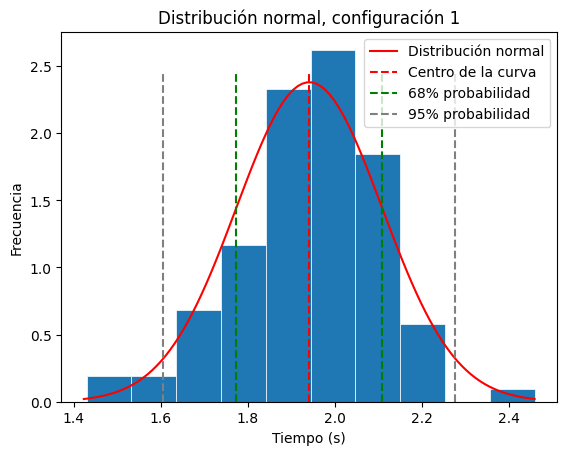

In [28]:
#Normal distribution conf 1

dist_norm_a = norm(loc=mean_1, scale=stdev_1)

#Ploting

fig2, ax2 = plt.subplots()

x_1=np.linspace(dist_norm_a.ppf(0.001), dist_norm_a.ppf(0.999), 100)
ax2.hist(x=med_a["Tiempo"], density=True, linewidth=0.5, edgecolor="white")
ax2.plot(x_1, dist_norm_a.pdf(x_1), "r-", label="Distribución normal")

ax2.vlines(dist_norm_a.mean(), ymin=0, ymax=dist_norm_a.mean()+0.5, colors="r", linestyle="--", label="Centro de la curva")
ax2.vlines(x=(dist_norm_a.mean()+dist_norm_a.std()), ymin=0, ymax=dist_norm_a.mean()+0.5, colors="g", linestyle="--", label="68% probabilidad")
ax2.vlines(x=(dist_norm_a.mean()-dist_norm_a.std()), ymin=0, ymax=dist_norm_a.mean()+0.5, colors="g", linestyle="--")
ax2.vlines(x=(dist_norm_a.mean()-(2*dist_norm_a.std())), ymin=0, ymax=dist_norm_a.mean()+0.5, colors="0.5", linestyle="--",label="95% probabilidad")
ax2.vlines(x=(dist_norm_a.mean()+(2*dist_norm_a.std())), ymin=0, ymax=dist_norm_a.mean()+0.5, colors="0.5", linestyle="--")

ax2.set_xlabel("Tiempo (s)")
ax2.set_ylabel("Frecuencia")

ax2.set_title("Distribución normal, configuración 1")

plt.legend(loc='best')
plt.show()

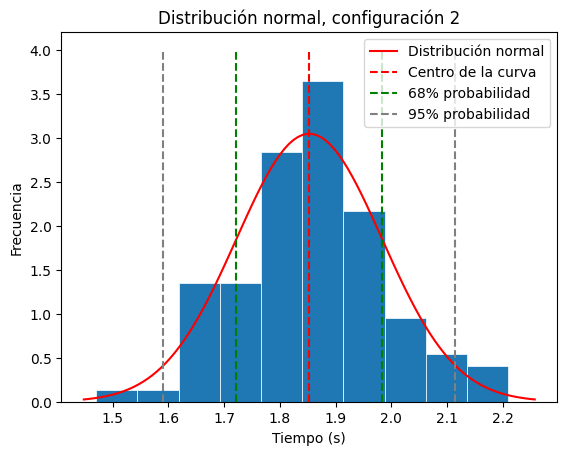

In [29]:
#Normal distribution conf 2

dist_norm_b = norm(loc=mean_2, scale=stdev_2)

#Ploting

fig3, ax3 = plt.subplots()

x_2=np.linspace(dist_norm_b.ppf(0.001), dist_norm_b.ppf(0.999), 100)
ax3.hist(x=med_b["Tiempo"], density=True, linewidth=0.5, edgecolor="white")
ax3.plot(x_2, dist_norm_b.pdf(x_2), "r-", label="Distribución normal")

ax3.vlines(dist_norm_b.mean(), ymin=0, ymax=4, colors="r", linestyle="--", label="Centro de la curva")
ax3.vlines(x=(dist_norm_b.mean()+dist_norm_b.std()), ymin=0, ymax=4, colors="g", linestyle="--", label="68% probabilidad")
ax3.vlines(x=(dist_norm_b.mean()-dist_norm_b.std()), ymin=0, ymax=4, colors="g", linestyle="--")
ax3.vlines(x=(dist_norm_b.mean()-(2*dist_norm_b.std())), ymin=0, ymax=4, colors="0.5", linestyle="--",label="95% probabilidad")
ax3.vlines(x=(dist_norm_b.mean()+(2*dist_norm_b.std())), ymin=0, ymax=4, colors="0.5", linestyle="--")

ax3.set_xlabel("Tiempo (s)")
ax3.set_ylabel("Frecuencia")

ax3.set_title("Distribución normal, configuración 2")

plt.legend(loc='best')
plt.show()

## Conclusiones
 
Una vez realiza el experimento, obtenidos y analizados los datos concluimos que, de la *Tabla 2* determinados que los valores más confiables se encuentran entre los intervalos de tiempo $(1.94 \pm 0.17) s$ para la configuración 1 y $(1.85 \pm 0.13 ) s$ para la configuración 2. Como existe solapamiento entre ambos rangos, realizamos el cálculo del *promedio ponderado* y el *error estándar combinado* para obtener el valor del rango del periodo del péndulo según las ecuaciones *(4)* y *(5)* y luego verificar con el error porcentual según la ecuación *(3)* si el valor es aceptable. 

Luego de realizar los cálculos, vemos que el error porcentual se encuentra por encima del 10%, lo cuál no es un número aceptable. Por lo tanto, podemos definir que el valor del periodo del péndulo se encuentra entre los intervalos $(1.94 \pm 0.17) s$ y $(1.85 \pm 0.13 ) s$.

In [30]:
weigth_1 = 1/ stdev_1
weigth_2 = 1/stdev_2

average = (weigth_1 * mean_1 + weigth_2 * mean_2 )/ (weigth_1+weigth_2)
comb_std = np.sqrt(1/(weigth_1+weigth_2))

print("Promedio ponderado: ","{0:.3}".format(average))
print("Error estándar combinado: ","{0:.2}".format(comb_std))
print("Error porcentual: ","{0:.4}".format(comb_std*100/average))

Promedio ponderado:  1.89
Error estándar combinado:  0.27
Error porcentual:  14.33


## Bibliografía

**($^{1}$)** Baird, D.C. Experimentación, una introducción a la teoría de mediciones y al diseño de experimentos. Prentice Hall Hispanoamericana S.A., 1991.

**($^{2}$)** Roederer, J.G. Mecánica Elemental. Quinta ed., EUDEBA, 1975.


## Apéndices

### Apéndice 1

Histogramas y cálculo de moda, promedio y StDev de las primeras 20 y 60 mediciones de cada configuración.

In [31]:
#Measurent data conf 1 first 20 and 60

med_a_avg_first_20 = med_a["Tiempo"].head(20).mean()
med_a_std_first_20 = med_a["Tiempo"].head(20).std()

med_a_avg_first_60 = med_a["Tiempo"].head(60).mean()
med_a_std_first_60 = med_a["Tiempo"].head(60).std()

print("Configuración 1: ")
print("Promedio primeras 20 mediciones: ","{0:.3}".format(med_a_avg_first_20))
print("Error estándar primeras 20 mediciones: ","{0:.2}".format(med_a_std_first_20))

print("Promedio primeras 60 mediciones: ","{0:.3}".format(med_a_avg_first_60))
print("Error estándar primeras 60 mediciones: ","{0:.2}".format(med_a_std_first_60))

#Ploting coonf 1 first 20 and 60.
fig4, ax4 = plt.subplots(1,2)

ax4[0].hist(med_a["Tiempo"].head(20), edgecolor="white", linewidth=0.5, color="g")
ax4[0].set_title("Primeras 20 mediciones")

ax4[1].hist(med_a["Tiempo"].head(60), edgecolor="white", linewidth=0.5, color="g")
ax4[1].set_title("Primeras 60 mediciones")

fig4.suptitle("Histogramas Configuración 1")
fig4.tight_layout()
plt.show()


Configuración 1: 
Promedio primeras 20 mediciones:  2.0
Error estándar primeras 20 mediciones:  0.21
Promedio primeras 60 mediciones:  1.97
Error estándar primeras 60 mediciones:  0.17


Configuración 2: 
Promedio primeras 20 mediciones:  1.85
Error estándar primeras 20 mediciones:  0.13
Promedio primeras 60 mediciones:  1.86
Error estándar primeras 60 mediciones:  0.12


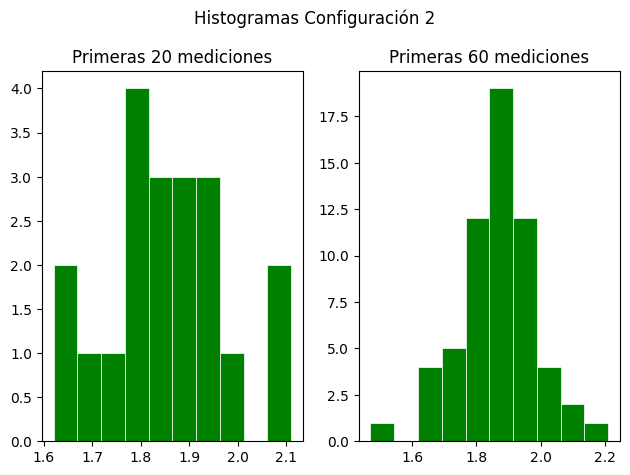

In [ ]:
#Measurent data conf 2 first 20 and 60

med_b_avg_first_20 = med_b["Tiempo"].head(20).mean()
med_b_std_first_20 = med_b["Tiempo"].head(20).std()

med_b_avg_first_60 = med_b["Tiempo"].head(60).mean()
med_b_std_first_60 = med_b["Tiempo"].head(60).std()

print("Configuración 2: ")
print("Promedio primeras 20 mediciones: ","{0:.3}".format(med_b_avg_first_20))
print("Error estándar primeras 20 mediciones: ","{0:.2}".format(med_b_std_first_20))

print("Promedio primeras 60 mediciones: ","{0:.3}".format(med_b_avg_first_60))
print("Error estándar primeras 60 mediciones: ","{0:.2}".format(med_b_std_first_60))
#Ploting conf 2 first 20 and 60.
fig5, ax5 = plt.subplots(1,2)

ax5[0].hist(med_b["Tiempo"].head(20), edgecolor="white", linewidth=0.5, color="g")
ax5[0].set_title("Primeras 20 mediciones")

ax5[1].hist(med_b["Tiempo"].head(60), edgecolor="white", linewidth=0.5, color="g")
ax5[1].set_title("Primeras 60 mediciones")

fig5.suptitle("Histogramas Configuración 2")
fig5.tight_layout()
plt.show()

### Apéndice 2

Curvas de distribución de distribución normal, según los histogramas obtenidos en las primeras 20 y 60 mediciones de cada configuración.

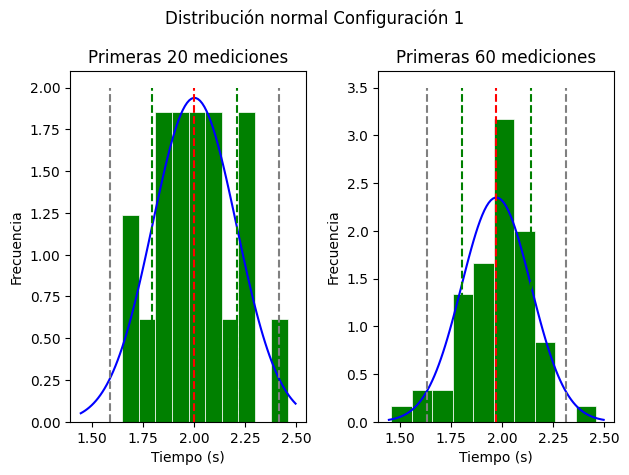

In [ ]:
#Normal distribution conf1 first 20 and 60

dist_norm_a_first_20 = norm(loc=med_a_avg_first_20, scale=med_a_std_first_20)
dist_norm_a_first_60 = norm(loc=med_a_avg_first_60, scale=med_a_std_first_60)

#Ploting

fig6, ax6 = plt.subplots(1,2)

x_3_1= np.linspace(dist_norm_a_first_20.ppf(0.001), dist_norm_a_first_20.ppf(0.999), 100)
x_3_1= np.linspace(dist_norm_a_first_60.ppf(0.001), dist_norm_a_first_60.ppf(0.999), 100)

ax6[0].hist(x=med_a["Tiempo"].head(20), density=True, linewidth=0.5, edgecolor="white", color="g")
ax6[0].plot(x_3_1, dist_norm_a_first_20.pdf(x_3_1), "b-", label="Distribución normal")
ax6[0].vlines(dist_norm_a_first_20.mean(), ymin=0, ymax=2, colors="r", linestyle="--", label="Centro de la curva")
ax6[0].vlines(x=(dist_norm_a_first_20.mean()+dist_norm_a_first_20.std()), ymin=0, ymax=2, colors="g", linestyle="--", label="68% probabilidad")
ax6[0].vlines(x=(dist_norm_a_first_20.mean()-dist_norm_a_first_20.std()), ymin=0, ymax=2, colors="g", linestyle="--")
ax6[0].vlines(x=(dist_norm_a_first_20.mean()-(2*dist_norm_a_first_20.std())), ymin=0, ymax=2, colors="0.5", linestyle="--",label="95% probabilidad")
ax6[0].vlines(x=(dist_norm_a_first_20.mean()+(2*dist_norm_a_first_20.std())), ymin=0, ymax=2, colors="0.5", linestyle="--")
ax6[0].set_xlabel("Tiempo (s)")
ax6[0].set_ylabel("Frecuencia")
ax6[0].set_title("Primeras 20 mediciones")

ax6[1].hist(x=med_a["Tiempo"].head(60), density=True, linewidth=0.5, edgecolor="white", color="g")
ax6[1].plot(x_3_1, dist_norm_a_first_60.pdf(x_3_1), "b-", label="Distribución normal")
ax6[1].vlines(dist_norm_a_first_60.mean(), ymin=0, ymax=3.5, colors="r", linestyle="--", label="Centro de la curva")
ax6[1].vlines(x=(dist_norm_a_first_60.mean()+dist_norm_a_first_60.std()), ymin=0, ymax=3.5, colors="g", linestyle="--", label="68% probabilidad")
ax6[1].vlines(x=(dist_norm_a_first_60.mean()-dist_norm_a_first_60.std()), ymin=0, ymax=3.5, colors="g", linestyle="--")
ax6[1].vlines(x=(dist_norm_a_first_60.mean()-(2*dist_norm_a_first_60.std())), ymin=0, ymax=3.5, colors="0.5", linestyle="--",label="95% probabilidad")
ax6[1].vlines(x=(dist_norm_a_first_60.mean()+(2*dist_norm_a_first_60.std())), ymin=0, ymax=3.5, colors="0.5", linestyle="--")
ax6[1].set_xlabel("Tiempo (s)")
ax6[1].set_ylabel("Frecuencia")
ax6[1].set_title("Primeras 60 mediciones")

fig6.suptitle("Distribución normal Configuración 1")
fig6.tight_layout()
plt.show()

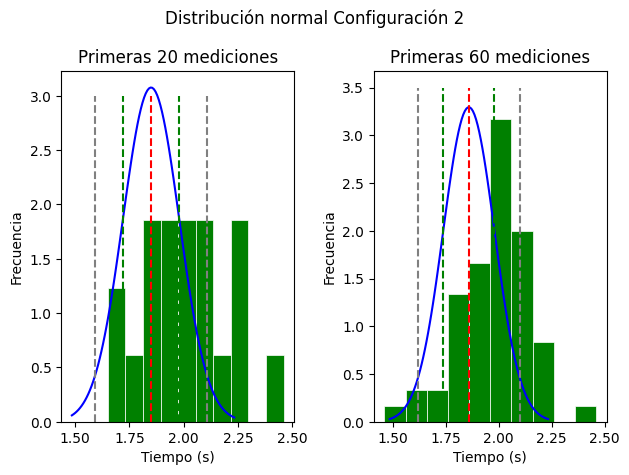

In [ ]:
#Normal distribution conf1 first 20 and 60

dist_norm_b_first_20 = norm(loc=med_b_avg_first_20, scale=med_b_std_first_20)
dist_norm_b_first_60 = norm(loc=med_b_avg_first_60, scale=med_b_std_first_60)

#Ploting

fig7, ax7 = plt.subplots(1,2)

x_3_1= np.linspace(dist_norm_b_first_20.ppf(0.001), dist_norm_b_first_20.ppf(0.999), 100)
x_3_1= np.linspace(dist_norm_b_first_60.ppf(0.001), dist_norm_b_first_60.ppf(0.999), 100)

ax7[0].hist(x=med_a["Tiempo"].head(20), density=True, linewidth=0.5, edgecolor="white", color="g")
ax7[0].plot(x_3_1, dist_norm_b_first_20.pdf(x_3_1), "b-", label="Distribución normal")
ax7[0].vlines(dist_norm_b_first_20.mean(), ymin=0, ymax=3, colors="r", linestyle="--", label="Centro de la curva")
ax7[0].vlines(x=(dist_norm_b_first_20.mean()+dist_norm_b_first_20.std()), ymin=0, ymax=3, colors="g", linestyle="--", label="68% probabilidad")
ax7[0].vlines(x=(dist_norm_b_first_20.mean()-dist_norm_b_first_20.std()), ymin=0, ymax=3, colors="g", linestyle="--")
ax7[0].vlines(x=(dist_norm_b_first_20.mean()-(2*dist_norm_b_first_20.std())), ymin=0, ymax=3, colors="0.5", linestyle="--",label="95% probabilidad")
ax7[0].vlines(x=(dist_norm_b_first_20.mean()+(2*dist_norm_b_first_20.std())), ymin=0, ymax=3, colors="0.5", linestyle="--")
ax7[0].set_xlabel("Tiempo (s)")
ax7[0].set_ylabel("Frecuencia")
ax7[0].set_title("Primeras 20 mediciones")

ax7[1].hist(x=med_a["Tiempo"].head(60), density=True, linewidth=0.5, edgecolor="white", color="g")
ax7[1].plot(x_3_1, dist_norm_b_first_60.pdf(x_3_1), "b-", label="Distribución normal")
ax7[1].vlines(dist_norm_b_first_60.mean(), ymin=0, ymax=3.5, colors="r", linestyle="--", label="Centro de la curva")
ax7[1].vlines(x=(dist_norm_b_first_60.mean()+dist_norm_b_first_60.std()), ymin=0, ymax=3.5, colors="g", linestyle="--", label="68% probabilidad")
ax7[1].vlines(x=(dist_norm_b_first_60.mean()-dist_norm_b_first_60.std()), ymin=0, ymax=3.5, colors="g", linestyle="--")
ax7[1].vlines(x=(dist_norm_b_first_60.mean()-(2*dist_norm_b_first_60.std())), ymin=0, ymax=3.5, colors="0.5", linestyle="--",label="95% probabilidad")
ax7[1].vlines(x=(dist_norm_b_first_60.mean()+(2*dist_norm_b_first_60.std())), ymin=0, ymax=3.5, colors="0.5", linestyle="--")
ax7[1].set_xlabel("Tiempo (s)")
ax7[1].set_ylabel("Frecuencia")
ax7[1].set_title("Primeras 60 mediciones")

fig7.suptitle("Distribución normal Configuración 2")
fig7.tight_layout()
plt.show()